# **爬山演算法(Hill climbing, HC)**

只找到次優解: 1449 迭代次數 500
方案為： [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]


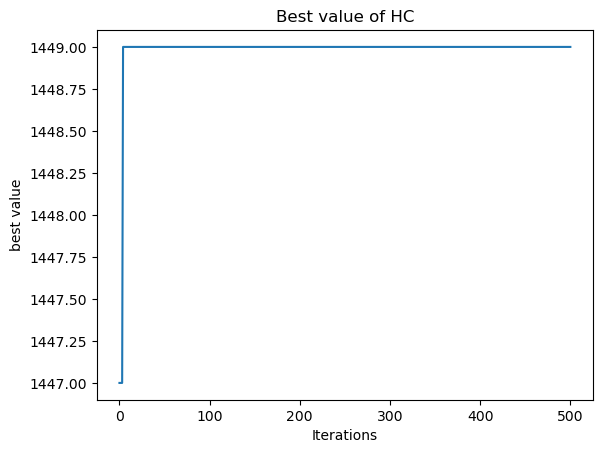

In [7]:
import random
import math
import matplotlib.pyplot as plt

global m,C;    # m個物品 ,背包容量C
global time,balance;    #  time 迭代次數, balance  平衡次數
global best;   #best 記錄全局最優
m=15; T=1.0; af =1;
time =500;  balance = 200; 
best_way=[0]*m;   now_way=[0]*m  #  best_way 記錄全局最優解方案   now_way 記錄當前解方案  
weight=[70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]; value=[135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
x_list = [i for i in range(0, 501, 1)]
best_value_list = []

def cop(a,b,le):     #複製函數 把b數組的值賦值a數組
    for i in range(le):
        a[i]=b[i]
def calc(x):  #計算背包價值
    global C,wsum;
    vsum=0;wsum=0;
    for i in range(m):
        vsum +=x[i]*value[i];  wsum += x[i]*weight[i];    
    return  vsum;
def produce():  #初始產生隨機解
    while (1>0):
        for k in range(m):
            if(random.random() < 0.5):  now_way[k]=1;
            else: now_way[k]=0;
        calc(now_way)
        if(wsum <C): break;
    global best;
    best=calc(now_way);
    cop(best_way,now_way,m);

def init():   #初始化函數
    global C,best,T;
    C = 750;
    best=-1;
    produce()    #產生初始解
def get(x):      #隨機將背包中已經存在的物品取出
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==1): x[ob]=0;break;
def put(x):      #隨機放入背包中不存在的物品
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==0): x[ob]=1;break;       
def solve():  #迭代函數
    global best,T,balance;
    test=[0]*m;
    now = 0;   #當前背包價值
    for i in range(balance):
        now = calc(now_way);
        cop(test,now_way,m);
        ob = random.randint(0,m-1); #隨機選取某個物品
        if(test[ob]==1): put(test);test[ob]=0;  #在背包中則將其拿出，並加入其它物品
        else:   #不在背包中則直接加入或替換掉已在背包中的物品
            if(random.random()<0.5):test[ob]=1; 
            else : get(test); test[ob]=1;
        temp= calc(test);
        if(wsum>C):continue;    # 非法解則跳過
        if(temp > best): best=temp; cop(best_way,test,m);     #更新全局最優
        
        if(temp > now): cop(now_way,test,m);       #直接接受新解 
        else:
            g = 1.0*(temp-now)/T;
            if(random.random() < math.exp(g)):   #概率接受劣解
                cop(now_way,test,m);    
                
#*****************************主函數**********************        
init();
isGood = 0;
for i in range(time):      
    solve();
    best_value_list.append(best)
        
best_value_list.append(best)
if(isGood == 0):   print('只找到次優解:',best,'迭代次數',time);
print('方案為：',best_way);

plt.plot(x_list, best_value_list)
plt.xlabel("Iterations")
plt.ylabel("best value")
plt.title(f"Best value of HC")
plt.show()

# **模擬退火演算法(Simulated annealing, SA)**

只找到次優解: 1458 迭代次數 500
方案為： [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


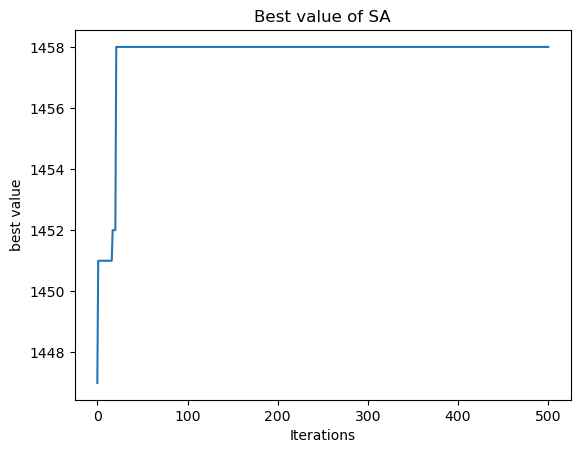

In [8]:
import random
import math
import matplotlib.pyplot as plt

global m,C;    # m個物品 ,背包容量C
global time,balance;    #  time 迭代次數, balance  平衡次數
global best,T,af;   #best 記錄全局最優  T 溫度  af退火率
m=15; T=500.0; af =0.95;
time =500;  balance = 200; 
best_way=[0]*m;   now_way=[0]*m  #  best_way 記錄全局最優解方案   now_way 記錄當前解方案  
weight=[70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]; value=[135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
x_list = [i for i in range(0, 501, 1)]
best_value_list = []

def cop(a,b,le):     #複製函數 把b數組的值賦值a數組
    for i in range(le):
        a[i]=b[i]
def calc(x):  #計算背包價值
    global C,wsum;
    vsum=0;wsum=0;
    for i in range(m):
        vsum +=x[i]*value[i];  wsum += x[i]*weight[i];    
    return  vsum;
def produce():  #初始產生隨機解
    while (1>0):
        for k in range(m):
            if(random.random() < 0.5):  now_way[k]=1;
            else: now_way[k]=0;
        calc(now_way)
        if(wsum <C): break;
    global best;
    best=calc(now_way);
    cop(best_way,now_way,m);

def init():   #初始化函數
    global C,best,T;
    C = 750;
    best=-1;
    produce()    #產生初始解
def get(x):      #隨機將背包中已經存在的物品取出
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==1): x[ob]=0;break;
def put(x):      #隨機放入背包中不存在的物品
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==0): x[ob]=1;break;       
def solve():  #迭代函數
    global best,T,balance;
    test=[0]*m;
    now = 0;   #當前背包價值
    for i in range(balance):
        now = calc(now_way);
        cop(test,now_way,m);
        ob = random.randint(0,m-1); #隨機選取某個物品
        if(test[ob]==1): put(test);test[ob]=0;  #在背包中則將其拿出，並加入其它物品
        else:   #不在背包中則直接加入或替換掉已在背包中的物品
            if(random.random()<0.5):test[ob]=1; 
            else : get(test); test[ob]=1;
        temp= calc(test);
        if(wsum>C):continue;    # 非法解則跳過
        if(temp > best): best=temp; cop(best_way,test,m);     #更新全局最優
        
        if(temp > now): cop(now_way,test,m);       #直接接受新解 
        else:
            g = 1.0*(temp-now)/T;
            if(random.random() < math.exp(g)):   #概率接受劣解
                cop(now_way,test,m);    
                
#*****************************主函數**********************        
init();
isGood = 0;
for i in range(time):      
    solve();
    T = T*af;    #溫度下降
    best_value_list.append(best)
        
best_value_list.append(best)
if(isGood == 0):   print('只找到次優解:',best,'迭代次數',time);
print('方案為：',best_way);

plt.plot(x_list, best_value_list)
plt.xlabel("Iterations")
plt.ylabel("best value")
plt.title(f"Best value of SA")
plt.show()